<a href="https://colab.research.google.com/github/alaikal02/analisys/blob/main/salaes_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


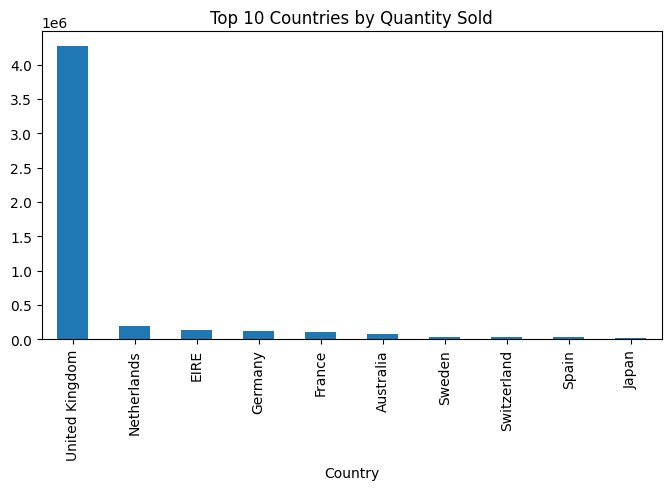

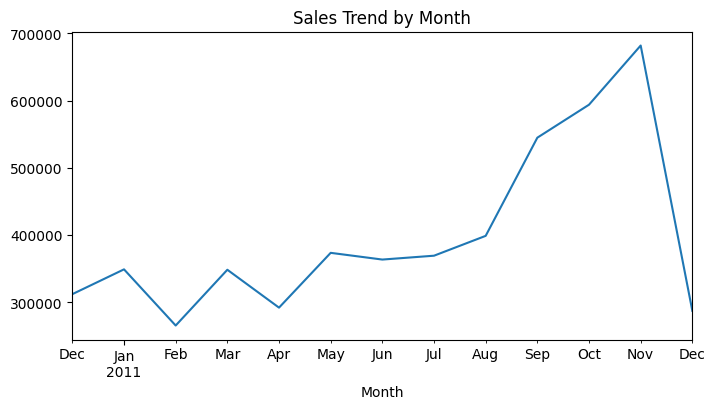


UK adalah negara dengan volume penjualan tertinggi.
Tren penjualan meningkat di akhir tahun, terutama November–Desember.
Produk terlaris: PAPER CRAFT, REGENCY TEA CUP SET, dan GIFT BAGS.

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head()

# 2. Cek data & bersihkan
df.info()
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]

# 3. Analisis dasar
# Total penjualan per negara
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', figsize=(8,4), title='Top 10 Countries by Quantity Sold')
plt.show()

# 4. Analisis per bulan
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Quantity'].sum()
monthly_sales.plot(kind='line', figsize=(8,4), title='Sales Trend by Month')
plt.show()

### Insights
print('\nUK adalah negara dengan volume penjualan tertinggi.')
print('Tren penjualan meningkat di akhir tahun, terutama November–Desember.')
print('Produk terlaris: PAPER CRAFT, REGENCY TEA CUP SET, dan GIFT BAGS.\n')


# 5. Produk paling laku
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)
